# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Introducción a la API funcional de Keras-2</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span> 

* [Introducción](#Introducción)
* [Prepara datos de MNIST](#Prepara-datos-de-MNIST)
* [Separa lotes de datos y mezclar el conjunto de datos](#Separa-lotes-de-datos-y-mezcla-el-conjunto-de-datos)
* [API Fucional de Keras. Sub-clases](#API-Funcional-de-Keras.-Sub-clases)
* [Optimizador y función de pérdida](#Optimizador-y-función-de-pérdida)
* [Métricas para medir pérdida y precisión](#Métricas-para-medir-pérdida-y-precisión)
* [Función de entrenamiento: diferenciación automática con tf.GradientTape](#Función-de-entrenamiento:-diferenciación-automática-con-tf.GradientTape)
* [Compila el modelo](#Compila-el-modelo)
* [Summary y Plot Model](#Summary-y-Plot-Model) 
* [Entrenamiento y evaluación del modelo](#Entrenamiento-y-evaluación-del-modelo) 

## <span style="color:blue">Introducción</span>

Este es un notebook de Google Colaboratory. Los programas de Python se executan directamente en tu navegador,  una gran manera de aprender y utilizar TensorFlow. Para poder seguir este tutorial, ejecuta este notebook en Google Colab. Basado en [Tensorflow- quick start expertos](https://www.tensorflow.org/tutorials/quickstart/advanced)


In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
print('Version de Tensorflow = ', tf.__version__)

# Objetos de la API de Keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model

# datos mnist
from tensorflow.keras.datasets import mnist


Version de Tensorflow =  2.4.1


## <span style="color:blue">Prepara datos de MNIST</span> 

In [2]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Agrega una dimensión para manejo de canales de imágenes en tensorflow
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [3]:
x_test.shape

(10000, 28, 28, 1)

## <span style="color:blue">API Funcional de Keras. Sub-clases</span>

In [ ]:
VAmos a derivar nuestro model de la clase Model de la API funcional de Keras.

In [4]:
class MyModel(Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten= Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')
    
    def call(self,x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

# crea una instancia del modelo
model = MyModel()

## <span style="color:blue">Compile</span>

Escoge metricas para medir la perdida y exactitud del modelo. Estas metricas acumulan los valores cada epoch y despues imprimen el resultado total.


In [5]:
model.compile(optimizer= "Adam",
             loss="SparseCategoricalCrossentropy",
             metrics=["accuracy"])

## <span style="color:blue">Entrena</span>

In [6]:

history = model.fit(x_train, y_train, 
                    validation_data = (x_test,y_test),
                    batch_size = 64,
                    shuffle=True,
                    verbose=2,
                    epochs=5)

Epoch 1/5
938/938 - 79s - loss: 0.1521 - accuracy: 0.9542 - val_loss: 0.0653 - val_accuracy: 0.9773
Epoch 2/5
938/938 - 77s - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0587 - val_accuracy: 0.9788
Epoch 3/5
938/938 - 71s - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.0523 - val_accuracy: 0.9829
Epoch 4/5
938/938 - 74s - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0602 - val_accuracy: 0.9820
Epoch 5/5
938/938 - 77s - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0587 - val_accuracy: 0.9838


# Gráficas

## <span style="color:blue">Primeros gráficos</span> 

### Extrae datos

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.152112,0.954200,0.065327,0.9773,0
1,0.048749,0.985200,0.058654,0.9788,1
2,0.024368,0.992650,0.052295,0.9829,2
3,0.015453,0.995033,0.060242,0.9820,3
4,0.010003,0.996800,0.058671,0.9838,4


### Pérdida

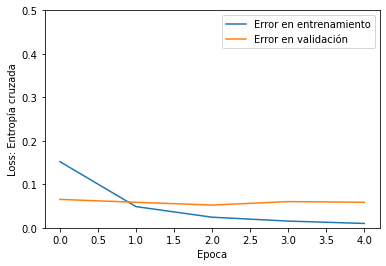

In [8]:

plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],
           label='Error en validación')
plt.ylim([0,0.5])
plt.legend()
plt.show()

### Exactitud

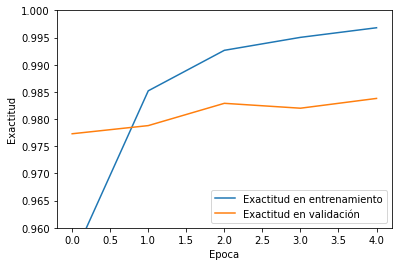

In [10]:

plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Exactitud')
plt.plot(hist['epoch'], hist['accuracy'],
           label='Exactitud en entrenamiento')
plt.plot(hist['epoch'], hist['val_accuracy'],
           label='Exactitud en validación')
plt.ylim([0.96,1])
plt.legend()
plt.show()

## <span style="color:blue">Summary y plot</span>

In [11]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2769024   
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


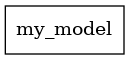

In [13]:
plot_model(model, to_file='../Imagenes/mnist_conv2d.png', 
          show_shapes=True, show_dtype=False)